   <h2 style = "color : Brown"> CASE STUDY OF LEAD SCORING  </h2>

In [1443]:
# Importing all the required libraries and packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

### Step 1: Importing Data

In [1444]:
# Loading the data into as dataframe
lead= pd.read_csv(r'Leads.csv')

In [1445]:
# Checking how the dataframe looks like 
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2:  Data Inspection

In [1446]:
# Inspecting the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1447]:
# Checking the shape of the dataframe
lead.shape

(9240, 37)

In [1448]:
# Inspecting the numerical variables of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Preparation

In [1449]:
# Checking the columns with values starting with "Select"
cols1= lead.columns
selcols=[]
for i in range(len(cols1)):
    if len(lead[cols1[i]].isin(['Select']).unique())>1:
        selcols.append(cols1[i])
print(selcols)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [1450]:
# Converting the letters of the values of the variables to lower case
lead=lead.applymap(lambda s:s.lower() if type(s) == str else s)

In [1451]:
# Replacing the values that are 'select' as 'Null'
lead = lead.replace('select',np.nan)

In [1452]:
# Checking for the unique values in each variable
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [1453]:
# Checking the null value percentage in each variable 
round(100*(lead.isnull().sum()/len(lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1454]:
# Imputing the null values with with different value 'not provided' as we don't want to alter the actual data 
lead['Specialization'] = lead['Specialization'].fillna('not provided') 
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('not provided')
lead['Country'] = lead['Country'].fillna('not provided')
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('not provided')

In [1455]:
# Dropping the columns with more than 30% null values
cols= lead.columns
for i in cols :
        if((100*(lead[i].isnull().sum()/len(lead)))>=30):
            lead.drop(i, axis=1, inplace=True)

In [1456]:
# Checking the null value counts again after dropping some columns
round(100*(lead.isnull().sum()/len(lead)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [1457]:
# Checking the values of 'Lead Source' column for imputation of null values.
lead['Lead Source'].value_counts().head()

google            2873
direct traffic    2543
olark chat        1755
organic search    1154
reference          534
Name: Lead Source, dtype: int64

In [1458]:
# Checking the values of 'TotalVisits' column for imputation of null values.
lead['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [1459]:
# Checking the values of 'Page Views Per Visit' column for imputation of null values.
lead['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [1460]:
# Checking the values of 'Last Activity' column for imputation of null values.
lead['Last Activity'].value_counts().head()

email opened               3437
sms sent                   2745
olark chat conversation     973
page visited on website     640
converted to lead           428
Name: Last Activity, dtype: int64

In [1461]:
# Storing the modes of all the values of all the columns into a dictionary
imputing_values={'Lead Source':'google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'email Opened'}

In [1462]:
# Imputing the null values from the dictonary created above
lead= lead.fillna(value=imputing_values)

In [1463]:
# Checking the dataframe for null values again
round(100*(lead.isnull().sum()/len(lead)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [1464]:
# Checking the dataframe for categorical attributes of all the columns 
for i in lead.columns:
    print(lead[i].astype('category').value_counts())
    print('*********************************************************************')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
*********************************************************************
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
*********************************************************************
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Ori

In [1465]:
# Dropping the ' Prospect ID'  as it is unique for each individual customer
lead= lead.drop('Prospect ID', axis=1)

### Data transformation

#### Converting some binary variables (Yes/No) to 0/1

In [1466]:
# Assigning numerical variables to categories with 'Yes' to 1 and 'No' to 0 or converting binary variables (Yes/No) to (1/0)
category={"No":0,"Yes":1,"no":0,"yes":1}
lead['Do Not Email']= lead['Do Not Email'].map(category)
lead['Do Not Call']= lead['Do Not Call'].map(category)
lead['Search']= lead['Search'].map(category)
lead['Magazine']= lead['Magazine'].map(category)
lead['Newspaper Article']= lead['Newspaper Article'].map(category)
lead['X Education Forums']= lead['X Education Forums'].map(category)
lead['Newspaper']= lead['Newspaper'].map(category)
lead['Digital Advertisement']= lead['Digital Advertisement'].map(category)
lead['Through Recommendations']= lead['Through Recommendations'].map(category)
lead['Receive More Updates About Our Courses']= lead['Receive More Updates About Our Courses'].map(category)
lead['A free copy of Mastering The Interview']= lead['A free copy of Mastering The Interview'].map(category)

In [1467]:
# Assigning and grouping some values of some coluns into a common value
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')  

In [1468]:
# Combining Management Specializations because they show similar trends

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [1469]:
# Replacing the null values of 'What is your current occupation' column as 'Unemployed'
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [1470]:
# Replacing Nan values with Mode "Better Career Prospects"

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [1471]:
# Replacing Null Values and combining low frequency values of 'Last Activity'

lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [1472]:
# Replacing the low frequency values of 'Country' column to either 'not provided' and 'outside india'
def slot(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead['Country'] = lead.apply(lambda x:slot(x['Country']), axis = 1)
lead['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [1473]:
# Inspecting the dataframe again 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Number                                    9240 non-null   int64 
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9240 non-null   object
 3   Do Not Email                                   9240 non-null   int64 
 4   Do Not Call                                    9240 non-null   int64 
 5   Converted                                      9240 non-null   int64 
 6   TotalVisits                                    9240 non-null   object
 7   Total Time Spent on Website                    9240 non-null   int64 
 8   Page Views Per Visit                           9240 non-null   object
 9   Last Activity                                  9240 non-null   

In [1474]:
# Converting some columns to numeric
lead.TotalVisits= pd.to_numeric(lead.TotalVisits)
lead['Page Views Per Visit']= pd.to_numeric(lead['Page Views Per Visit'])

### Exploratory Data Analysis

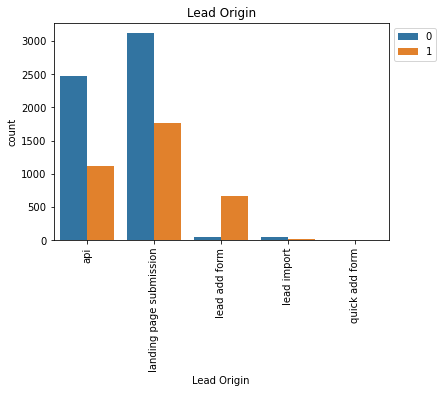

In [1475]:
# Plotting countplot for 'Lead Origin' wrt target variable 'Converted'
sns.countplot(lead['Lead Origin'],hue=lead.Converted).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

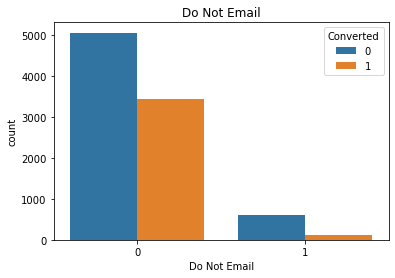

In [1476]:
# Plotting countplot for 'Do Not Email' wrt target variable 'Converted'
sns.countplot(lead['Do Not Email'],hue=lead.Converted)
plt.title('Do Not Email')
plt.show()

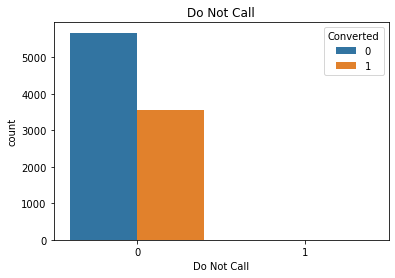

In [1477]:
# Plotting countplot for 'Do Not Call' wrt target variable 'Converted'
sns.countplot(lead['Do Not Call'],hue=lead.Converted)
plt.title('Do Not Call')
plt.show()

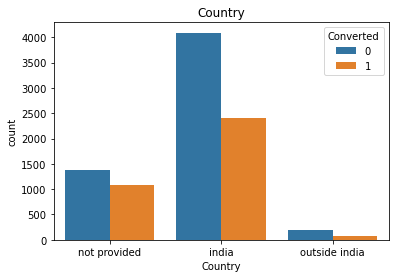

In [1478]:
# Plotting countplot for 'Country' wrt target variable 'Converted'
sns.countplot(lead['Country'],hue=lead.Converted)
plt.title('Country')
plt.show()

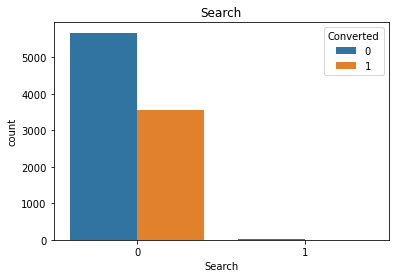

In [1479]:
# Plotting countplot for 'Search' wrt target variable 'Converted'
sns.countplot(lead['Search'],hue=lead.Converted)
plt.title('Search')
plt.show()

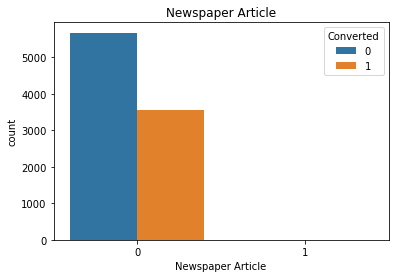

In [1480]:
# Plotting countplot for 'Newspaper Article' wrt target variable 'Converted'
sns.countplot(lead['Newspaper Article'],hue=lead.Converted)
plt.title('Newspaper Article')
plt.show()

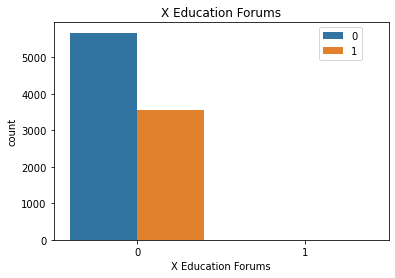

In [1481]:
# Plotting countplot for 'X Education Forums' wrt target variable 'Converted'
sns.countplot(lead['X Education Forums'],hue=lead.Converted)
plt.title('X Education Forums')
plt.legend(bbox_to_anchor=(0.935,1))
plt.show()

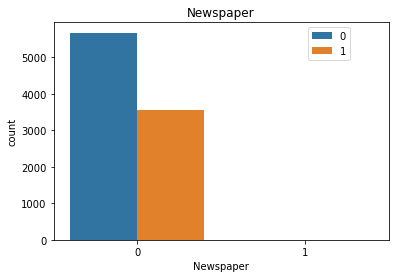

In [1482]:
# Plotting countplot for 'Newspaper' wrt target variable 'Converted'
sns.countplot(lead['Newspaper'],hue=lead.Converted)
plt.title('Newspaper')
plt.legend(bbox_to_anchor=(.9,1))
plt.show()

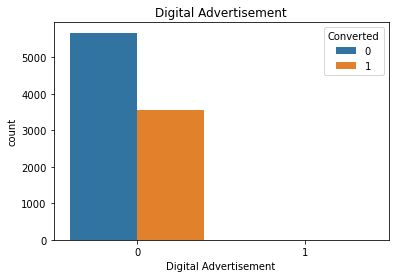

In [1483]:
# Plotting countplot for 'Digital Advertisement' wrt target variable 'Converted'
sns.countplot(lead['Digital Advertisement'],hue=lead.Converted)
plt.title('Digital Advertisement')
plt.show()

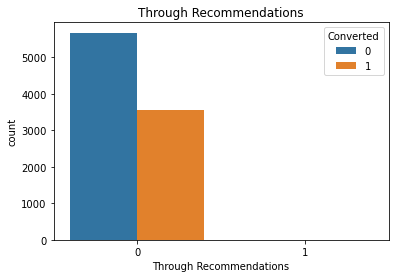

In [1484]:
# Plotting countplot for 'Through Recommendations' wrt target variable 'Converted'
sns.countplot(lead['Through Recommendations'],hue=lead.Converted)
plt.title('Through Recommendations')
plt.show()

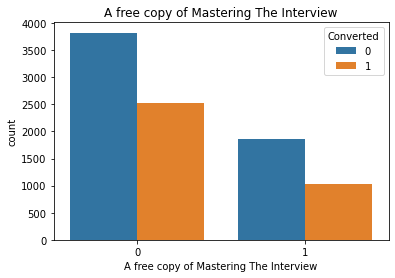

In [1485]:
# Plotting countplot for 'A free copy of Mastering The Interview' wrt target variable 'Converted'
sns.countplot(lead['A free copy of Mastering The Interview'],hue=lead.Converted)
plt.title('A free copy of Mastering The Interview')
plt.show()

In [1486]:
# Clubbing lower frequency values
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['had a phone conversation','email marked spam','unreachable','unsubscribed','email bounced','resubscribed to emails','view in browser link clicked','approached upfront','form submitted on website','email received'],'other_notable_activity')

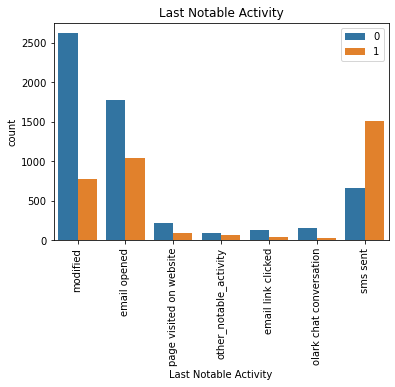

In [1487]:
# Plotting countplot for 'Last Notable Activity' wrt target variable 'Converted'
sns.countplot(lead['Last Notable Activity'],hue=lead.Converted).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

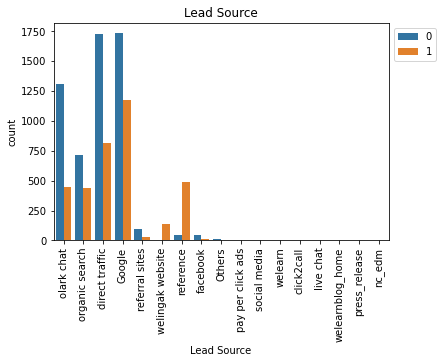

In [1488]:
# Plotting countplot for 'Lead Source' wrt target variable 'Converted'
sns.countplot(lead['Lead Source'],hue=lead.Converted).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

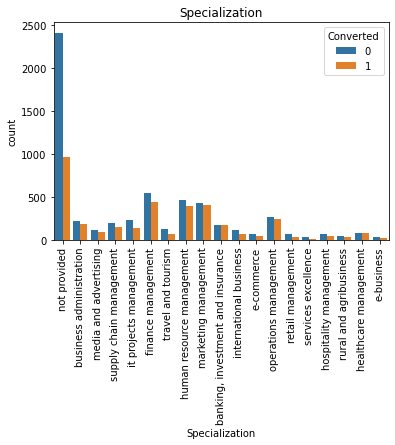

In [1489]:
# Plotting countplot for 'Specialization' wrt target variable 'Converted'
sns.countplot(lead['Specialization'],hue=lead.Converted).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

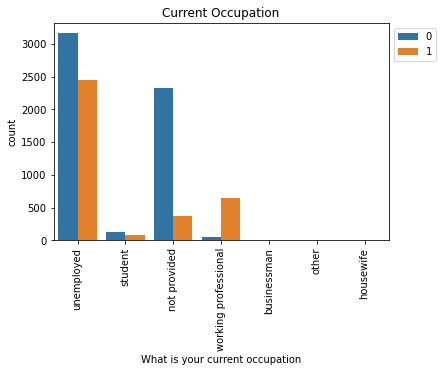

In [1490]:
# Plotting countplot for 'What is your current occupation' wrt target variable 'Converted'
sns.countplot(lead['What is your current occupation'],hue=lead.Converted).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

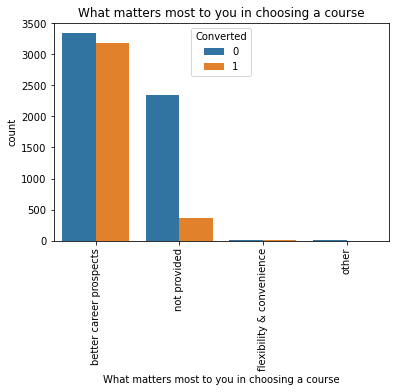

In [1491]:
# Plotting countplot for 'What matters most to you in choosing a course' wrt target variable 'Converted'
sns.countplot(lead['What matters most to you in choosing a course'],hue=lead.Converted).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show()

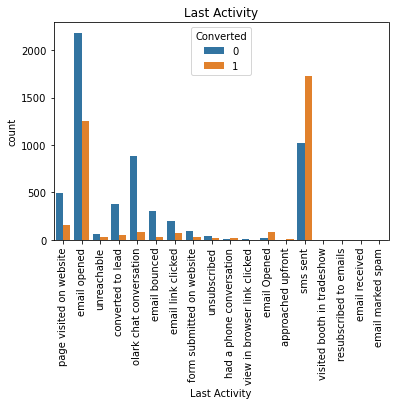

In [1492]:
# Plotting countplot for 'Last Activity' wrt target variable 'Converted'
sns.countplot(lead['Last Activity'],hue=lead.Converted).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

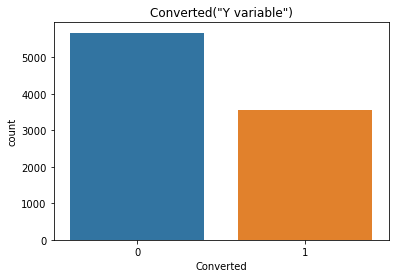

In [1493]:
# Plotting countplot for 'Converted'
sns.countplot(lead['Converted'])
plt.title('Converted("Y variable")')
plt.show()

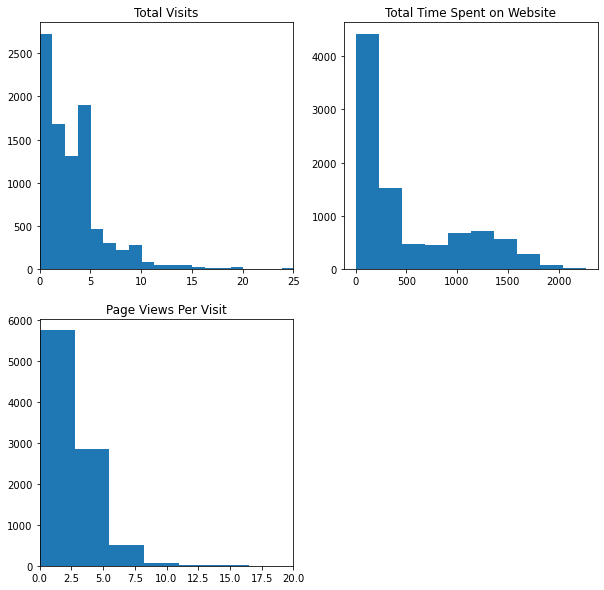

In [1494]:
# Plotting subplot of histograms for all the continuos variables  
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [1495]:
# After the analysis creating a list of redundant variables
columns_to_drop_yet=['Country','What matters most to you in choosing a course','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [1496]:
# Dropping the redundant variables 
lead = lead.drop(columns_to_drop_yet,1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [1497]:
# Checking correlation of the variables 
corelation=lead.corr()

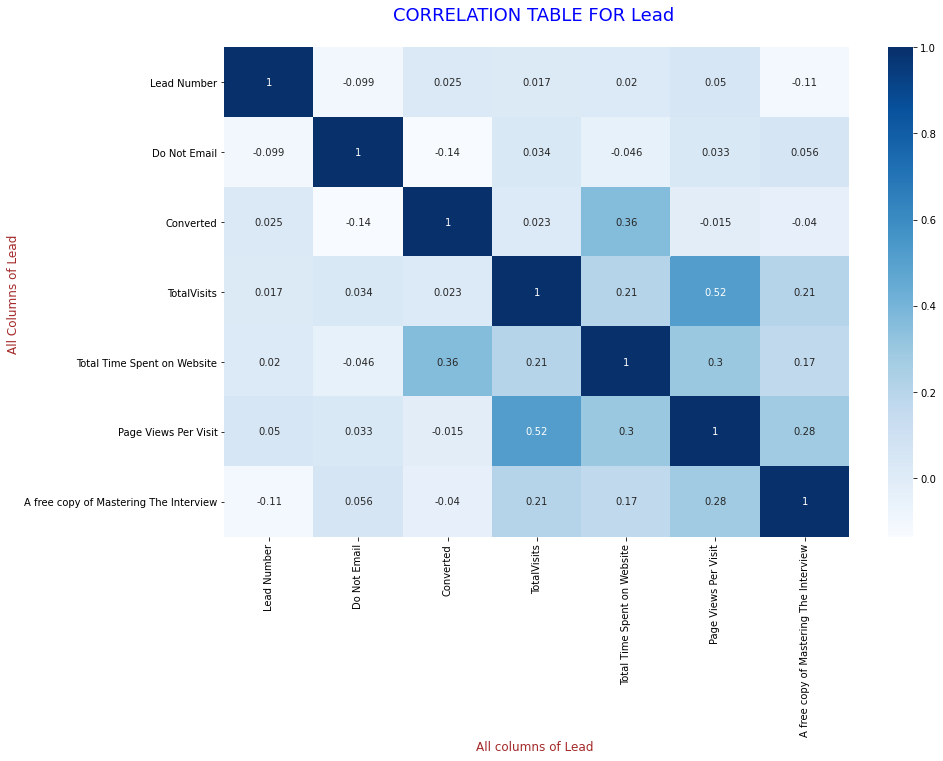

In [1498]:
# Plotting the heatmap of correlation matrix of the dataframe
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corelation,  cmap='Blues',annot=True)
plt.title('CORRELATION TABLE FOR Lead \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("All columns of Lead ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("All Columns of Lead ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()


### Numerical Analysis

#### Checking for Outliers

In [1499]:
# Checking the values of numeric columns to quantiles
numeric = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


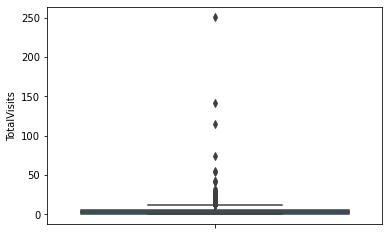

In [1500]:
# Seeing the data distribtion for 'TotalVisits' 
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['TotalVisits'])
plt.show()

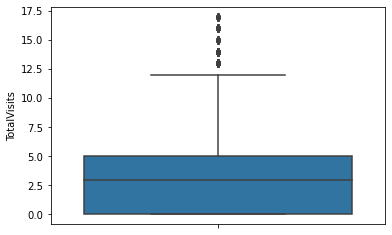

In [1501]:
# Capping outliers of the 'TotalVisits '
Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]
Q1 = lead.TotalVisits.quantile(0.01)
leads = lead[(lead.TotalVisits >= Q1)]
sns.boxplot(y=lead['TotalVisits'])
plt.show()

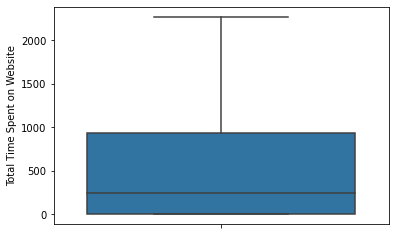

In [1502]:
# Seeing the data distribtion for 'Total Time Spent on Website'
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.show()

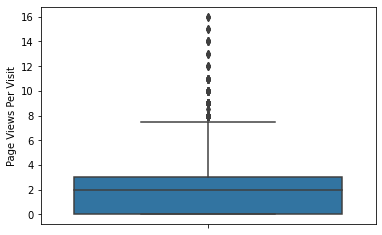

In [1503]:
# Seeing the data distribtion for 'Page Views Per Visit'
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

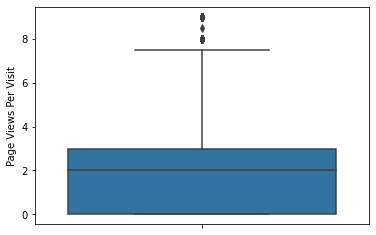

In [1504]:
# Capping outliers of the 'Page Views Per Visit'
Q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['Page Views Per Visit'] <= Q3]
Q1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[lead['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

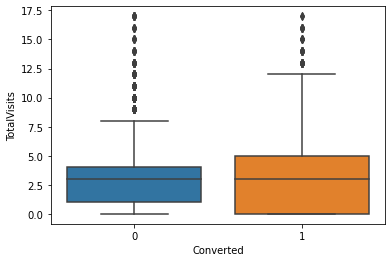

In [1505]:
# Checking the distribution of 'TotalVisits' wrt target variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

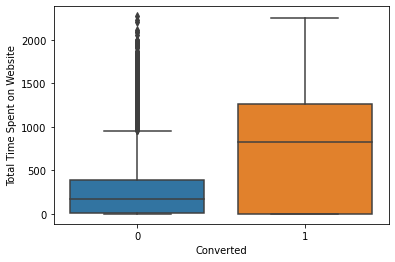

In [1506]:
# Checking the distribution of 'Total Time Spent on Website' wrt target variable 'Converted'
sns.boxplot(x=lead.Converted, y=lead['Total Time Spent on Website'])
plt.show()

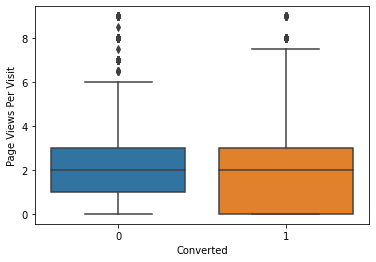

In [1507]:
# Checking the distribution of 'Page Views Per Visit' wrt target variable 'Converted'
sns.boxplot(x=lead.Converted,y=lead['Page Views Per Visit'])
plt.show()

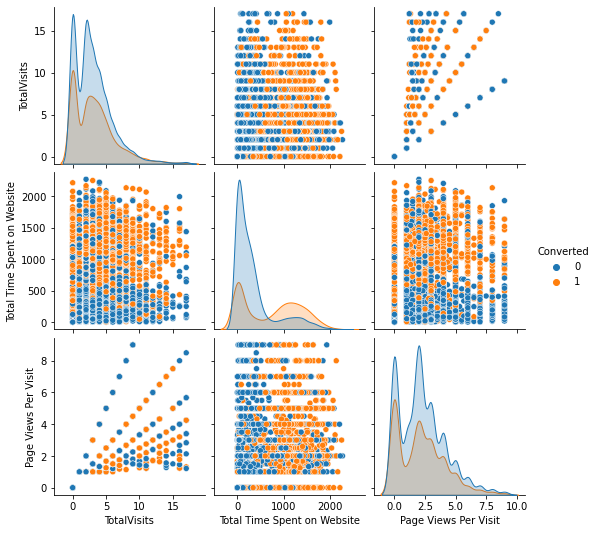

In [1508]:
sns.pairplot(lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']],diag_kind='kde',hue='Converted')
plt.show()

In [1509]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9090 non-null   int64  
 1   Lead Origin                             9090 non-null   object 
 2   Lead Source                             9090 non-null   object 
 3   Do Not Email                            9090 non-null   int64  
 4   Converted                               9090 non-null   int64  
 5   TotalVisits                             9090 non-null   float64
 6   Total Time Spent on Website             9090 non-null   int64  
 7   Page Views Per Visit                    9090 non-null   float64
 8   Last Activity                           9090 non-null   object 
 9   Specialization                          9090 non-null   object 
 10  What is your current occupation         9090 non-null   obje

In [1510]:
# Getting a list of categorical columns

categorical_cols= lead.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

#### For categorical variables with multiple levels, create dummy features 

In [1511]:
# Creating dummy variables for required categorical variables 
dummy = pd.get_dummies(lead[['Lead Origin','What is your current occupation','Specialization','Lead Source','Last Activity','Last Notable Activity']], drop_first=True)

lead = pd.concat([lead,dummy],1)

In [1512]:
# Checking the overall information of the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 80 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9090 non-null   int64  
 1   Lead Origin                                           9090 non-null   object 
 2   Lead Source                                           9090 non-null   object 
 3   Do Not Email                                          9090 non-null   int64  
 4   Converted                                             9090 non-null   int64  
 5   TotalVisits                                           9090 non-null   float64
 6   Total Time Spent on Website                           9090 non-null   int64  
 7   Page Views Per Visit                                  9090 non-null   float64
 8   Last Activity                                         9090

#### Dropping the redundant variables

In [1513]:
# Dropping redundant variables 
lead = lead.drop(['What is your current occupation_not provided','Lead Number','Lead Origin','Lead Source', 'Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [1514]:
# Checking the dataframe again
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 70 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   float64
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   Lead Origin_landing page submission                   9090 non-null   uint8  
 6   Lead Origin_lead add form                             9090 non-null   uint8  
 7   Lead Origin_lead import                               9090 non-null   uint8  
 8   Lead Origin_quick add form                            9090

### Step 4: Test-Train Split

In [1515]:
# Putting response variable to y
y= lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1516]:
# Putting feature variable to X
X= lead.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,What is your current occupation_housewife,What is your current occupation_other,...,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other_notable_activity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Let's start by splitting our data into a training set and a test set.

In [1517]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [1518]:
# Initiating scaler
scaler=MinMaxScaler()

In [1519]:
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,What is your current occupation_housewife,What is your current occupation_other,...,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other_notable_activity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
302,0.0,0.411765,0.110035,0.258889,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6087,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1033,0.0,0.294118,0.206866,0.555556,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7656,1.0,0.352941,0.154930,0.666667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3241,0.0,0.235294,0.428257,0.147778,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1520]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.448844884488445

### Step 6: Looking at Correlations

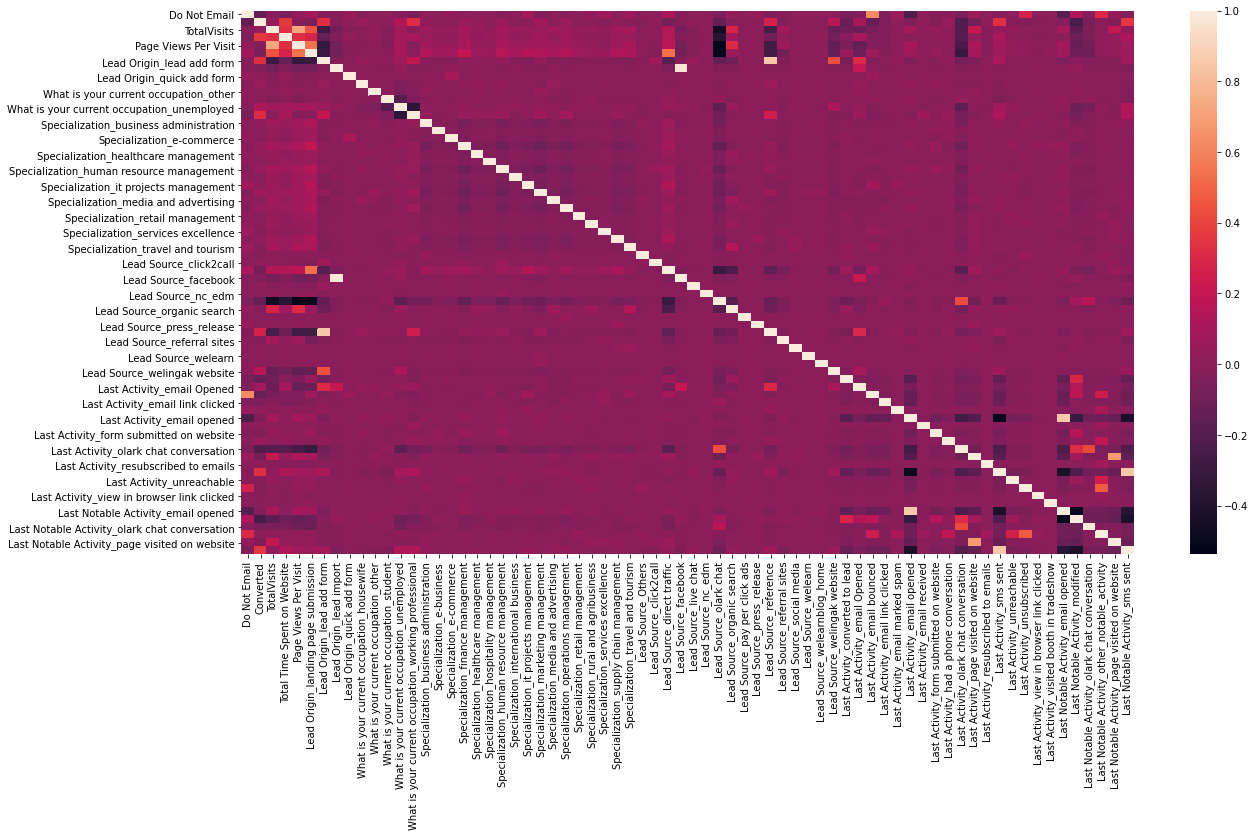

In [1521]:
# Let's see the correlation matrix after dummy variable creation
plt.figure(figsize = (20,10))
sns.heatmap(lead.corr())
plt.show()

In [1522]:
# Dropping highly correlated dummy variable/categories

corr_dummy=['Lead Source_olark chat','What is your current occupation_unemployed']

X_train=X_train.drop(corr_dummy,1)      # dropping from X train set

X_test=X_test.drop(corr_dummy,1)       # dropping from X test set

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

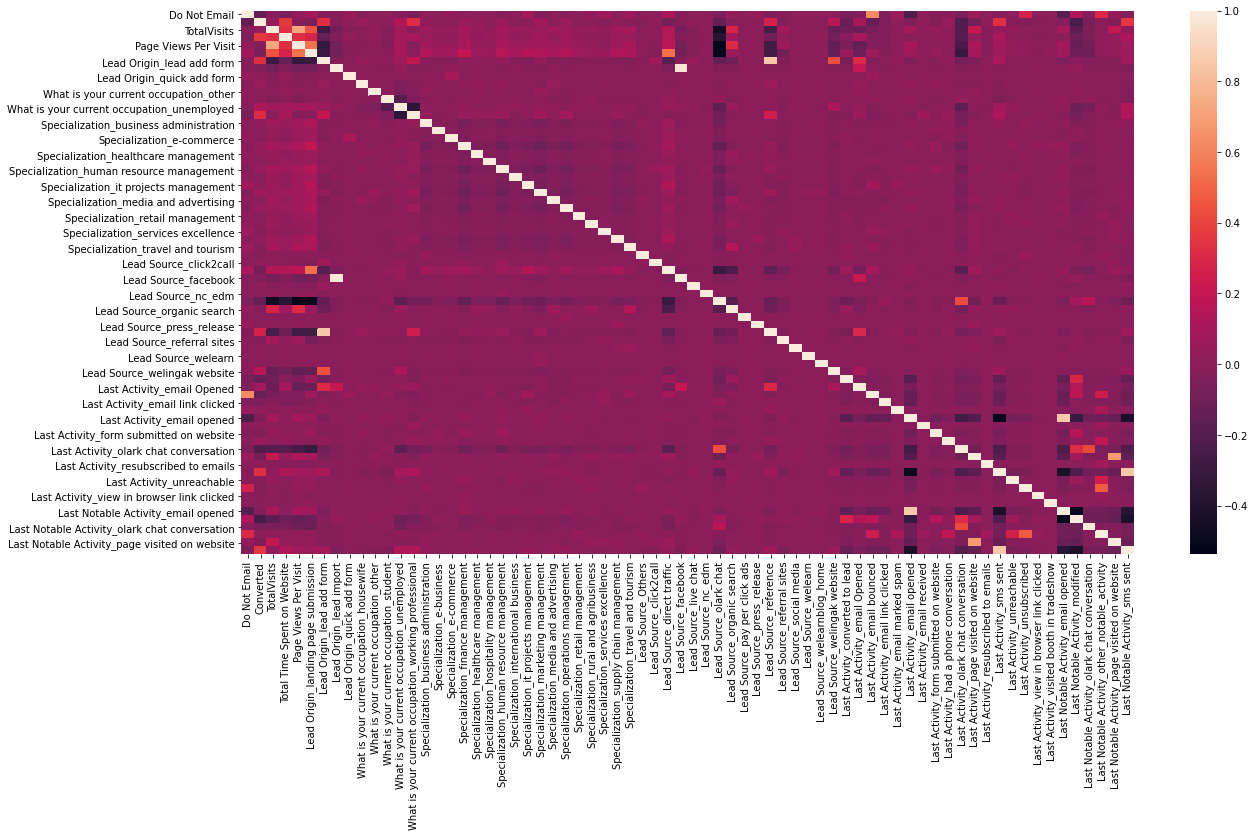

In [1523]:
plt.figure(figsize = (20,10))
sns.heatmap(lead.corr())
plt.show()

### Step 7: Model Building

In [1524]:
# Initiating LogisticRegression() function 
logreg = LogisticRegression()

In [1525]:
#BUILDING MODEL #1

X_train_sm1 = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Jul 2021   Deviance:                          nan
Time:                        15:05:00   Pearson chi2:                 6.05e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.081e+15   2.95e+07   3.66e+07      0.000    1.08e+15    1.08e+15
Do Not Email                                         -7.924e+14   4.46e+06  -1.78e+08      0.000   -7.92e+14   -7.92e+14
TotalVisits                                           6.176e+14   7.62e+06   8.11e+07      0.000    6.18e+14    6.18e+14
Total Time Spent on Website                           3.047e+15   3.94e+06   7.73e+08      0.000    3.05e+15    3.05e+15
Page Views Per Visit                                 -1.219e+15   6.59e+06  -1.85e+08      0.000   -1.22e+15   -1.22e+15
Lead Origin_landing page submission                  -5.524e+14   3.09e+06  -1.79e+08      0.000   -5.52e+14   -5.52e+14
Lead Origin_lead add form                             2.202e+15   1.45e+07   1.52e+08      0.000     2.2e+15     2.2e+15
Lead Origin_lead import                               2.726e+15   6.84e+07   3.98e+07      0.000    2.73e+15    2.73e+15
Lead Origin_quick add form                            4.664e+13   6.79e+07   6.87e+05      0.000    4.66e+13    4.66e+13
What is your current occupation_housewife             3.249e+15   2.25e+07   1.44e+08      0.000    3.25e+15    3.25e+15
What is your current occupation_other                -7.834e+14   2.14e+07  -3.66e+07      0.000   -7.83e+14   -7.83e+14
What is your current occupation_student               4.193e+14   5.83e+06   7.19e+07      0.000    4.19e+14    4.19e+14
What is your current occupation_working professional  1.199e+15   3.41e+06   3.52e+08      0.000     1.2e+15     1.2e+15
Specialization_business administration                3.009e+14   4.69e+06   6.41e+07      0.000    3.01e+14    3.01e+14
Specialization_e-business                             7.757e+14   1.12e+07   6.91e+07      0.000    7.76e+14    7.76e+14
Specialization_e-commerce                              7.97e+14   8.22e+06    9.7e+07      0.000    7.97e+14    7.97e+14
Specialization_finance management                     4.107e+14    3.6e+06   1.14e+08      0.000    4.11e+14    4.11e+14
Specialization_healthcare management                  4.628e+14   6.77e+06   6.83e+07      0.000    4.63e+14    4.63e+14
Specialization_hospitality management                 3.329e+14   8.15e+06   4.09e+07      0.000    3.33e+14    3.33e+14
Specialization_human resource management              5.631e+14   3.69e+06   1.52e+08      0.000    5.63e+14    5.63e+14
Specialization_international business                 4.584e+14   6.47e+06   7.09e+07      0.000    4.58e+14    4.58e+14
Specialization_it projects management                 6.074e+14    4.8e+06   1.26e+08      0.000    6.07e+14    6.07e+14
Specialization_marketing management                   5.83

### Step 8: Feature Selection Using RFE

In [1526]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [1527]:
# Checking for boolean values of each column for RFE selection 
rfe.support_

array([ True,  True,  True,  True, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True])

In [1528]:
# Getting the preferance and ranking of the variables as provided by running RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 8),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 49),
 ('Lead Origin_quick add form', False, 30),
 ('What is your current occupation_housewife', True, 1),
 ('What is your current occupation_other', False, 2),
 ('What is your current occupation_student', False, 18),
 ('What is your current occupation_working professional', True, 1),
 ('Specialization_business administration', False, 25),
 ('Specialization_e-business', False, 11),
 ('Specialization_e-commerce', False, 9),
 ('Specialization_finance management', False, 15),
 ('Specialization_healthcare management', False, 24),
 ('Specialization_hospitality management', False, 35),
 ('Specialization_human resource management', False, 16),
 ('Specialization_international business', False, 22),
 ('Specialization_it projects manageme

In [1529]:
# Fetching the variables that are to be included in the initial linear model given by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_lead add form',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'Lead Source_welingak website', 'Last Activity_converted to lead',
       'Last Activity_email Opened', 'Last Activity_email bounced',
       'Last Activity_olark chat conversation',
       'Last Activity_view in browser link clicked',
       'Last Notable Activity_other_notable_activity',
       'Last Notable Activity_sms sent'],
      dtype='object')

In [1530]:
# Dropping columns which were dropped by RFE
X_train.columns[~rfe.support_]

Index(['Lead Origin_landing page submission', 'Lead Origin_lead import',
       'Lead Origin_quick add form', 'What is your current occupation_other',
       'What is your current occupation_student',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism', 'Lead Source_Others',
       'Lead So

In [1531]:
# Creating X_train dataframe with RFE selected variables
X_train_new = X_train[col]

In [1532]:
#BUILDING MODEL #2

X_train_sm2 = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.6
Date:                Wed, 14 Jul 2021   Deviance:                       5305.1
Time:                        15:05:02   Pearson chi2:                 6.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7459      0.076    -23.108      0.000      -1.894      -1.598
Do Not Email                                            -1.5452      0.195     -7.932      0.000      -1.927      -1.163
TotalVisits                                              0.9197      0.272      3.384      0.001       0.387       1.452
Total Time Spent on Website                              4.0913      0.155     26.416      0.000       3.788       4.395
Page Views Per Visit                                    -1.7579      0.241     -7.306      0.000      -2.229      -1.286
Lead Origin_lead add form                                3.3037      0.215     15.334      0.000       2.881       3.726
What is your current occupation_housewife               22.7962   1.43e+04      0.002      0.999   -2.81e+04    2.81e+04
What is your current occupation_working professional     2.7822      0.189     14.759      0.000       2.413       3.152
Lead Source_welingak website                             2.8370      1.028      2.761      0.006       0.823       4.851
Last Activity_converted to lead                         -1.3366      0.206     -6.493      0.000      -1.740      -0.933
Last Activity_email Opened                              -1.8775      0.438     -4.290      0.000      -2.735      -1.020
Last Activity_email bounced                             -1.4399      0.383     -3.764      0.000      -2.190      -0.690
Last Activity_olark chat conversation                   -1.1586      0.157     -7.369      0.000      -1.467      -0.850
Last Activity_view in browser link clicked             -22.3092   2.17e+04     -0.001      0.999   -4.25e+04    4.25e+04
Last Notable Activity_other_notable_activity             1.7504      0.302      5.800      0.000       1.159       2.342
Last Notable Activity_sms sent                           1.6204      0.081     19.959      0.000       1.461       1.780
========================================================================================================================
"""

In [1533]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm2)
y_train_pred[:10]

302     0.202286
6087    0.008741
1033    0.167200
7656    0.131927
3241    0.829679
5738    0.122510
7366    0.051932
3680    0.163606
4170    0.727627
43      0.113831
dtype: float64

In [1534]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20228633, 0.00874141, 0.16719999, 0.13192746, 0.82967927,
       0.12250958, 0.05193182, 0.16360614, 0.72762719, 0.11383102])

In [1535]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.202286,302
1,0,0.008741,6087
2,0,0.167200,1033
3,0,0.131927,7656
4,1,0.829679,3241


In [1536]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.202286,302,0
1,0,0.008741,6087,0
2,0,0.167200,1033,0
3,0,0.131927,7656,0
4,1,0.829679,3241,1


In [1537]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3492  443]
 [ 813 1615]]


In [1538]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8026088323118026


In [1539]:
# Calculating the VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.74
1,TotalVisits,4.47
2,Total Time Spent on Website,2.06
0,Do Not Email,1.83
10,Last Activity_email bounced,1.69
4,Lead Origin_lead add form,1.59
14,Last Notable Activity_sms sent,1.38
7,Lead Source_welingak website,1.29
6,What is your current occupation_working profes...,1.19
9,Last Activity_email Opened,1.17


In [1540]:
# Dropping 'What is your current occupation_housewife' column as its p-value is more than 0.5
X_train_new=X_train_new.drop(['What is your current occupation_housewife'],axis=1)

In [1541]:
#BUILDING MODEL #3
X_train_sm3 = sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.3
Date:                Wed, 14 Jul 2021   Deviance:                       5318.6
Time:                        15:05:02   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7381      0.075    -23.050      0.000      -1.886      -1.590
Do Not Email                                            -1.5486      0.195     -7.947      0.000      -1.930      -1.167
TotalVisits                                              0.9093      0.272      3.348      0.001       0.377       1.442
Total Time Spent on Website                              4.0956      0.155     26.464      0.000       3.792       4.399
Page Views Per Visit                                    -1.7546      0.240     -7.300      0.000      -2.226      -1.284
Lead Origin_lead add form                                3.3199      0.215     15.435      0.000       2.898       3.741
What is your current occupation_working professional     2.7772      0.189     14.730      0.000       2.408       3.147
Lead Source_welingak website                             2.8189      1.028      2.743      0.006       0.805       4.833
Last Activity_converted to lead                         -1.3448      0.206     -6.534      0.000      -1.748      -0.941
Last Activity_email Opened                              -1.9000      0.438     -4.340      0.000      -2.758      -1.042
Last Activity_email bounced                             -1.4450      0.383     -3.775      0.000      -2.195      -0.695
Last Activity_olark chat conversation                   -1.1661      0.157     -7.418      0.000      -1.474      -0.858
Last Activity_view in browser link clicked             -21.3122   1.32e+04     -0.002      0.999   -2.58e+04    2.58e+04
Last Notable Activity_other_notable_activity             1.7463      0.302      5.784      0.000       1.155       2.338
Last Notable Activity_sms sent                           1.6130      0.081     19.881      0.000       1.454       1.772
========================================================================================================================
"""

In [1542]:
y_train_pred = res.predict(X_train_sm3).values.reshape(-1)

In [1543]:
y_train_pred[:10]

array([0.20305282, 0.00873428, 0.16822706, 0.13146699, 0.82969336,
       0.12329417, 0.05194284, 0.16452208, 0.72782283, 0.11452768])

In [1544]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [1545]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.203053,302,0
1,0,0.008734,6087,0
2,0,0.168227,1033,0
3,0,0.131467,7656,0
4,1,0.829693,3241,1


In [1546]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8018230394468018


In [1547]:
# Calculating the VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.74
1,TotalVisits,4.47
2,Total Time Spent on Website,2.06
0,Do Not Email,1.83
9,Last Activity_email bounced,1.69
4,Lead Origin_lead add form,1.58
13,Last Notable Activity_sms sent,1.37
6,Lead Source_welingak website,1.29
5,What is your current occupation_working profes...,1.19
8,Last Activity_email Opened,1.17


In [1548]:
# Dropping 'Last Activity_view in browser link clicked' column as its p-value is more than 0.5
X_train_new=X_train_new.drop(['Last Activity_view in browser link clicked'],axis=1)

In [1549]:
#BUILDING MODEL #3
X_train_sm4 = sm.add_constant(X_train_new)
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.5
Date:                Wed, 14 Jul 2021   Deviance:                       5323.1
Time:                        15:05:03   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7412      0.075    -23.093      0.000      -1.889      -1.593
Do Not Email                                            -1.5387      0.194     -7.918      0.000      -1.920      -1.158
TotalVisits                                              0.9038      0.271      3.330      0.001       0.372       1.436
Total Time Spent on Website                              4.1019      0.155     26.509      0.000       3.799       4.405
Page Views Per Visit                                    -1.7505      0.240     -7.286      0.000      -2.221      -1.280
Lead Origin_lead add form                                3.3225      0.215     15.452      0.000       2.901       3.744
What is your current occupation_working professional     2.7545      0.187     14.757      0.000       2.389       3.120
Lead Source_welingak website                             2.8183      1.027      2.743      0.006       0.804       4.832
Last Activity_converted to lead                         -1.3419      0.206     -6.525      0.000      -1.745      -0.939
Last Activity_email Opened                              -1.9003      0.438     -4.341      0.000      -2.758      -1.042
Last Activity_email bounced                             -1.4341      0.382     -3.751      0.000      -2.183      -0.685
Last Activity_olark chat conversation                   -1.1633      0.157     -7.401      0.000      -1.471      -0.855
Last Notable Activity_other_notable_activity             1.7027      0.298      5.708      0.000       1.118       2.287
Last Notable Activity_sms sent                           1.6143      0.081     19.901      0.000       1.455       1.773
========================================================================================================================
"""

In [1550]:
# Calculating the VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.74
1,TotalVisits,4.47
2,Total Time Spent on Website,2.06
0,Do Not Email,1.83
9,Last Activity_email bounced,1.69
4,Lead Origin_lead add form,1.58
12,Last Notable Activity_sms sent,1.37
6,Lead Source_welingak website,1.29
5,What is your current occupation_working profes...,1.19
8,Last Activity_email Opened,1.17


In [1551]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm4)
y_train_pred[:10]

302     0.202477
6087    0.008889
1033    0.168074
7656    0.132605
3241    0.829737
5738    0.123002
7366    0.051931
3680    0.164114
4170    0.728102
43      0.114348
dtype: float64

In [1552]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20247663, 0.00888902, 0.16807362, 0.13260539, 0.82973694,
       0.12300243, 0.05193122, 0.16411434, 0.72810162, 0.11434754])

##### Creating a dataframe with the actual convertion flag and the predicted convertions

In [1553]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.202477,302
1,0,0.008889,6087
2,0,0.168074,1033
3,0,0.132605,7656
4,1,0.829737,3241


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [1554]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.202477,302,0
1,0,0.008889,6087,0
2,0,0.168074,1033,0
3,0,0.132605,7656,0
4,1,0.829737,3241,1


In [1555]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3490  445]
 [ 819 1609]]


In [1556]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8013515637278014


In [1557]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Metrics beyond  accuracy

In [1558]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6626853377265239

In [1559]:
# Let us calculate specificity
TN / float(TN+FP) 

0.8869123252858958

In [1560]:
# Calculate False Postive Rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.11308767471410419


In [1561]:
# positive predictive value 
print (TP / float(TP+FP))

0.7833495618305745


In [1562]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8099326990020886


### Step 9: Plotting the ROC Curve

In [1563]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1564]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

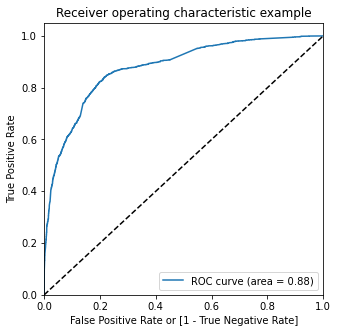

In [1565]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step 10: Finding Optimal Cutoff Point

In [1566]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.202477,302,0,1,1,1,0,0,0,0,0,0,0
1,0,0.008889,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.168074,1033,0,1,1,0,0,0,0,0,0,0,0
3,0,0.132605,7656,0,1,1,0,0,0,0,0,0,0,0
4,1,0.829737,3241,1,1,1,1,1,1,1,1,1,1,0


In [1567]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381581     1.000000     0.000000
0.1          0.1  0.567814     0.979819     0.313596
0.2          0.2  0.758290     0.878089     0.684371
0.3          0.3  0.803552     0.846376     0.777128
0.4          0.4  0.811881     0.794069     0.822872
0.5          0.5  0.801352     0.662685     0.886912
0.6          0.6  0.796794     0.584432     0.927827
0.7          0.7  0.784378     0.511532     0.952732
0.8          0.8  0.763791     0.427924     0.971029
0.9          0.9  0.714443     0.267710     0.990089


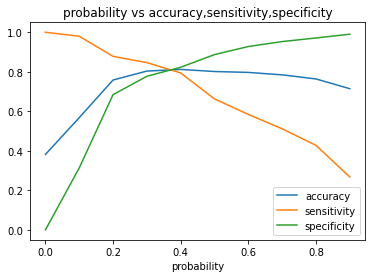

In [1618]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.title('probability vs accuracy,sensitivity,specificity')
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [1569]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.202477,302,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.008889,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.168074,1033,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.132605,7656,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.829737,3241,1,1,1,1,1,1,1,1,1,1,0,1


In [1570]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8098381266698098

In [1571]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3184,  751],
       [ 459, 1969]], dtype=int64)

In [1572]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1573]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8109555189456342

In [1574]:
# Let us calculate specificity
TN / float(TN+FP)

0.809148665819568

In [1575]:
# Calculate false postive rate - predicting convertion when customer has not converted
print(FP/ float(TN+FP))

0.19085133418043201


In [1576]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7238970588235294


In [1577]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8740049409827065


## Precision and Recall

##### Precision
TP / TP + FP

In [1578]:
print (TP / float(TP+FP))

0.7238970588235294


##### Recall
TP / TP + FN

In [1579]:
print (TP / float(TP+ FN))

0.8109555189456342


In [1580]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7833495618305745

In [1581]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6626853377265239


Important point to be noted from the outcomes for precision and recall score -

 - Our precison percentage is 72.4% approximately and recall percentage is 81%

 - This means we have very good model which explains relevancy of 72.4% and true relevant results about 81%.

As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted hence our focus on this will be more on Recall than Precision.

### Precision and recall tradeoff

In [1582]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    0
 6361    1
 6362    0
 Name: Predicted, Length: 6363, dtype: int64)

In [1583]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

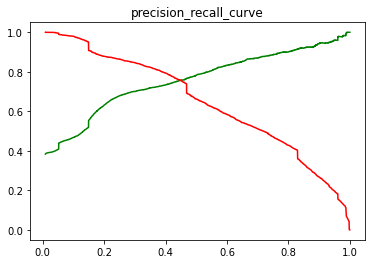

In [1619]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('precision_recall_curve')
plt.show()

#### From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

### Step 11: Making predictions on the test set

In [1585]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,What is your current occupation_housewife,What is your current occupation_other,...,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other_notable_activity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
6906,0.0,0.235294,0.673415,0.222222,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1873,0.0,0.117647,0.081866,0.222222,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
771,0.0,0.411765,0.021567,0.777778,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4495,0.0,0.235294,0.063380,0.444444,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9061,0.0,0.117647,0.786972,0.222222,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1586]:
X_test = X_test[X_train_new.columns]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,What is your current occupation_working professional,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email Opened,Last Activity_email bounced,Last Activity_olark chat conversation,Last Notable Activity_other_notable_activity,Last Notable Activity_sms sent
6906,0.0,0.235294,0.673415,0.222222,0,0,0,0,0,0,0,0,1
1873,0.0,0.117647,0.081866,0.222222,0,0,0,0,0,0,0,0,0
771,0.0,0.411765,0.021567,0.777778,0,0,0,0,0,0,0,0,0
4495,0.0,0.235294,0.063380,0.444444,0,0,0,0,0,0,0,0,0
9061,0.0,0.117647,0.786972,0.222222,0,0,0,0,0,0,0,0,0


In [1587]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [1588]:
y_test_pred = res.predict(X_test_sm)

In [1589]:
y_test_pred[:10]

6906    0.921221
1873    0.156029
771     0.066478
4495    0.114399
9061    0.769268
4929    0.609833
2308    0.181497
1034    0.119350
9033    0.125359
7008    0.923050
dtype: float64

In [1590]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1591]:
# Let's see the head
y_pred_1.head()

,0
6906,0.921221
1873,0.156029
771,0.066478
4495,0.114399
9061,0.769268


In [1592]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1593]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1594]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1595]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1596]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.921221
1,0,1873,0.156029
2,0,771,0.066478
3,0,4495,0.114399
4,1,9061,0.769268


In [1597]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1598]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [1599]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,6906,1,0.921221
1,1873,0,0.156029
2,771,0,0.066478
3,4495,0,0.114399
4,9061,1,0.769268


In [1600]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [1601]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,6906,1,0.921221,1
1,1873,0,0.156029,0
2,771,0,0.066478,0
3,4495,0,0.114399,0
4,9061,1,0.769268,1


In [1602]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8082141547488082

In [1603]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1381,  279],
       [ 244,  823]], dtype=int64)

In [1604]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1605]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7713214620431116

In [1606]:
# Let us calculate specificity
TN / float(TN+FP)

0.8319277108433735

### Conclusion
#### Valuable Insights -

 - The Accuracy, Precision and Recall score we got from test set in aceptable range.
 - We have high recall score than precision score which we were exactly looking for.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
   * Total Time Spent on Website
   * Lead Origin_Lead Add Form
   * Lead Source_welingak website
   * What is your current occupation_Working Professional
   * Last Notable Activity_other_notable_activity
   * Last Notable Activity_sms sent
##### Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.